# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)
import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class, retrieve_raw_data, further_processing_class
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.cluster_replacement import cluster_replacement_class, cluster_replacement_utils, plot_cluster_replacement
from decision_making_analysis.decision_making import decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, process_GUAT_trials_class, GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from visualization import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_functions
from visualization.animation import animation_func, animation_utils, animation_class
from machine_learning import machine_learning_utils, hyperparameter_tuning_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data_utils
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curvature_class

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from math import pi
from scipy.ndimage import gaussian_filter1d

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101



Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.


# Basic data

## Retrieve monkey data

In [6]:
PLAYER = "monkey"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data(exists_ok=True, min_distance_to_calculate_angle=10)
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()

monkey_information = data_item.monkey_information
ff_dataframe = data_item.ff_dataframe

ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted
cluster_around_target_indices = data_item.cluster_around_target_indices
ff_caught_T_new = data_item.ff_caught_T_new
caught_ff_num = len(ff_caught_T_new)
ff_flash_sorted = data_item.ff_flash_sorted
ff_flash_end_sorted = data_item.ff_flash_end_sorted
max_point_index = data_item.max_point_index
min_point_index = data_item.min_point_index

data_item.make_or_retrieve_target_clust_last_vis_df()
target_clust_last_vis_df = data_item.target_clust_last_vis_df
target_clust_last_vis_df['ff_index'] = target_clust_last_vis_df['target_index']

# data_item.make_or_retrieve_all_trial_patterns(exists_ok=True)
# data_item.make_or_retrieve_pattern_frequencies(exists_ok=True)
# data_item.make_or_retrieve_all_trial_features(exists_ok=True)
# data_item.make_or_retrieve_feature_statistics(exists_ok=True)
# data_item.make_info_of_monkey()
# data_item.make_or_retrieve_target_closest()
# data_item.make_or_retrieve_target_angle_smallest()

# target_closest = data_item.target_closest
# target_angle_smallest = data_item.target_angle_smallest
# all_trial_patterns = data_item.all_trial_patterns
# all_trial_features = data_item.all_trial_features
# pattern_frequencies = data_item.pattern_frequencies
# feature_statistics = data_item.feature_statistics

# info_of_monkey = data_item.info_of_monkey
# max_point_index = data_item.max_point_index
# min_point_index = data_item.min_point_index

# data_item.make_PlotTrials_args()
# data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)


PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)


plot_polar_args = (monkey_information,
                    ff_dataframe, 
                    ff_life_sorted,
                    ff_real_position_sorted,
                    ff_caught_T_new,
                    ff_flash_sorted,)


trial_total_num = 2
PLAYER = "monkey"

classic_plot_kwargs = {'player': PLAYER,
                       'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True,
                       'show_eye_positions': True,
                       'show_eye_positions_on_the_right': True,
                       'show_connect_path_eye_positions': True,
                       #=== below is different from animation_plot_kwargs
                       'hitting_arena_edge_ok': False,
                       'trial_too_short_ok': False}

combined_plot_kwargs = {'player': PLAYER,
                        'combined_plot': True,
                        'show_alive_fireflies': False,
                        'show_title': False,
                        'show_start': False}

plot_chunks_kwargs = {'player': PLAYER,
                      'show_stops': True,
                      'show_believed_target_positions': True,
                      'show_reward_boundary': True,
                      'show_scale_bar': True,
                      'hitting_arena_edge_ok': True,
                      'trial_too_short_ok': True,
                      'show_connect_path_ff': True,
                      'trail_color_var': 'abs_ddw',
                      'show_colorbar': True}


plot_polar_kwargs = {'rmax': 400,
                    'show_visible_ff': True,
                    'hitting_arena_edge_ok': True,
                    'return_axes': True,
                    'colors_show_overall_time': True,
                    'show_ff_in_memory': True,
                    'show_target_at_being_caught': True
}

print("player is", PLAYER)

animation_plot_kwargs = classic_plot_kwargs.copy()
animation_plot_kwargs['as_part_of_animation'] = True
animation_plot_kwargs['show_eye_positions_on_the_right'] = False   
animation_plot_kwargs['hitting_arena_edge_ok'] = True
animation_plot_kwargs['trial_too_short_ok'] = True
animation_plot_kwargs['images_dir'] = None

  
data_item.make_PlotTrials_args()
data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)



plotting_kwargs = {'player': 'monkey',
 'show_stops': True,
 'show_believed_target_positions': True,
 'show_reward_boundary': True,
 'show_scale_bar': True,
 'hitting_arena_edge_ok': True,
 'trial_too_short_ok': True,
 'show_connect_path_ff': True,
 'vary_color_for_connecting_path_ff': True,
 'show_points_when_ff_stop_being_visible': False,
 #'show_connect_path_ff_memory': True,
 'show_alive_fireflies': False,
 'show_visible_fireflies': True,
 'show_in_memory_fireflies': True,
 'connect_path_ff_max_distance': 400,
 #'show_connect_path_ff_except_targets': True,
 'adjust_xy_limits': True,
 'show_null_agent_trajectory': True,
 'show_only_ff_that_monkey_has_passed_by_closely': True,
 'show_null_trajectory_reaching_boundary_ok': False,
 'vary_color_for_connecting_path_ff': False}




Retrieved monkey data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0330/monkey_information.csv  and ff data from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0330/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from  all_monkey_data/processed_data/individual_monkey_data/monkey_Bruno/data_0330/ff_dataframe.h5
When take out monkey subset for GUAT, 624 clusters out of 831 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 1338


AttributeError: 'ProcessMonkeyData' object has no attribute 'model_folder_name'

In [ ]:
# PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)


# plot_polar_args = (monkey_information,
#                     ff_dataframe, 
#                     ff_life_sorted,
#                     ff_real_position_sorted,
#                     ff_caught_T_new,
#                     ff_flash_sorted,)

# data_item.make_PlotTrials_args()
# data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)


## ff_basic_info

In [ ]:
# make ff_basic_info
num_missing_elements = len(ff_real_position_sorted) - len(ff_caught_T_new)
ff_caught_T_new_extended = np.concatenate([ff_caught_T_new, np.repeat(np.nan, num_missing_elements)])
ff_believed_position_sorted_extended = np.concatenate([ff_believed_position_sorted, np.repeat(np.nan, num_missing_elements*2).reshape(-1,2)])

ff_basic_info_bundle = (ff_real_position_sorted, ff_believed_position_sorted_extended, ff_life_sorted, ff_caught_T_new_extended, ff_flash_end_sorted)

ff_basic_info = pd.DataFrame({'ff_index': range(len(ff_real_position_sorted)),
                            'caught_T': ff_caught_T_new_extended,
                            'real_x': ff_real_position_sorted[:,0],
                            'real_y': ff_real_position_sorted[:,1],
                            'believed_x': ff_believed_position_sorted_extended[:,0],
                            'believed_y': ff_believed_position_sorted_extended[:,1],
                            'life_start': ff_life_sorted[:,0],
                            'life_end': ff_life_sorted[:,1],
                            'flash_end': ff_flash_end_sorted,

})


ff_basic_info.head(3)

## dm (sparse)

In [ ]:
furnish_with_trajectory_data = False

dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information)
dm.retrieve_manual_anno()

dm.manual_anno = pseudo_manual_anno

dm.separate_manual_anno()
dm.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5)

dm.get_replacement_data()
dm.get_free_selection_data()

# dm.changing_pursued_ff_data = changing_pursued_ff_data
# dm.changing_pursued_ff_data_diff = changing_pursued_ff_data_diff
# dm.replacement_time = replacement_time
# dm.replacement_inputs = replacement_inputs
# dm.replacement_labels = replacement_labels

# dm.free_selection_inputs_df = free_selection_inputs_df
# dm.free_selection_inputs = free_selection_inputs
# dm.free_selection_labels = free_selection_labels
# dm.free_selection_time = free_selection_time

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# from sklearn.ensemble import BaggingClassifier
# bagging = BaggingClassifier()
dm.prepare_data_for_machine_learning(kind="replacement", furnish_with_trajectory_data=furnish_with_trajectory_data, trajectory_data_kind="position") 
dm.split_data_to_train_and_test(scaling_data=True)
dm.use_machine_learning_model(model=None)   
dm.get_pred_results_df()  

In [ ]:
dm.prepare_data_for_machine_learning(kind="free selection", furnish_with_trajectory_data=furnish_with_trajectory_data, trajectory_data_kind="position") 
dm.split_data_to_train_and_test(scaling_data=True)
dm.use_machine_learning_model(model=None)   
dm.get_pred_results_df() 

### plot predictions

In [ ]:
dm.manual_anno

In [ ]:
selected_cases = None
dm.plot_prediction_results(dm.wrong_predictions[:10], also_show_regular_plot=False) 

## moit (dense)

In [ ]:
reload(pattern_by_trials)
reload(decision_making_class)
reload(intended_targets_classes)

ff_dataframe_truncated = ff_dataframe[ff_dataframe['time_since_last_vis'] <= 2.5]

mot = intended_targets_classes.ModelOfIntendedTargets(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_flash_sorted, ff_life_sorted,
                                                       time_range_of_trajectory=[-0.5, 2.5], num_time_points_for_trajectory=10)

# moit.get_and_process_manual_anno_long(n_seconds_after_crossing_boundary=2.5)

moit.manual_anno = pseudo_manual_anno
moit.manual_anno_long = pseudo_manual_anno_long
moit.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary=2.5)

moit.get_input_data(num_ff_per_row=5, keeping_1_out_of_n_rows=5)

# store df that takes a long time to get
free_selection_inputs_df = moit.free_selection_inputs_df
free_selection_inputs = moit.free_selection_inputs
free_selection_labels = moit.free_selection_labels
free_selection_time = moit.free_selection_time
cases_for_inspection = moit.cases_for_inspection
sequence_of_obs_ff_indices = moit.sequence_of_obs_ff_indices
chosen_rows_of_df = moit.chosen_rows_of_df
non_chosen_rows_of_df = moit.non_chosen_rows_of_df

# moit.free_selection_inputs_df = free_selection_inputs_df
# moit.free_selection_inputs = free_selection_inputs
# moit.free_selection_labels = free_selection_labels
# moit.free_selection_time = free_selection_time
# moit.cases_for_inspection = cases_for_inspection
# moit.sequence_of_obs_ff_indices = sequence_of_obs_ff_indices
# moit.chosen_rows_of_df = chosen_rows_of_df
# moit.non_chosen_rows_of_df = non_chosen_rows_of_df

moit.prepare_data_for_machine_learning(furnish_with_trajectory_data=False, trajectory_data_kind="position")
#moit.turn_y_label_into_multi_class(manual_anno_mul = None, allow_multi_label = False)
moit.split_data_to_train_and_test(scaling_data=True, keep_whole_chunks=True)
moit.use_machine_learning_model(model=None)
moit.get_pred_results_df()
moit.plot_prediction_results(selected_cases=moit.wrong_predictions[:3], PlotTrials_args=PlotTrials_args)


In [ ]:
moit.plot_prediction_results(selected_cases=moit.wrong_predictions[:8], PlotTrials_args=PlotTrials_args)

In [ ]:
reload(decision_making_utils)
moit.plot_prediction_results(selected_cases=moit.wrong_predictions[8:30], PlotTrials_args=PlotTrials_args)

### check cases for inspection

In [ ]:
moit.cases_for_inspection

In [ ]:
best_arc_df

# multi-label

## experiment more

In [ ]:
# percentage of time points that are less than 15ms apart
t_diff = np.diff(monkey_information['time'])
len(np.where(t_diff < 0.015)[0])/len(t_diff)

In [ ]:
time_range_of_trajectory=[-0.5, 0.5]
num_time_points_for_trajectory=10
bin_width = (time_range_of_trajectory[1] - time_range_of_trajectory[0]) / (num_time_points_for_trajectory-1)
bin_width

In [ ]:

monkey_dt = (monkey_information['time'].iloc[-1] - monkey_information['time'].iloc[0]) / (len(monkey_information)-1)
monkey_dt

In [ ]:
len(stops_convolved[stops_convolved > 0]) / len(monkey_stops) # that's the percentage of having stops

## use class

In [ ]:
only_keep_part_covered_by_manual_anno_mul = True

reload(pattern_by_trials)
reload(decision_making_class)
reload(decision_making_utils)
reload(intended_targets_classes)
ff_dataframe_truncated = ff_dataframe[ff_dataframe['time_since_last_vis'] <= 2.5]
manual_anno_mul = pd.read_csv('multiff_analysis/manual_anno_multi_label.csv')

moit2 = intended_targets_classes.ModelOfMultipleIntendedTargets(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_flash_sorted, ff_life_sorted,
                                                       time_range_of_trajectory=[-0.5, 2.5], num_time_points_for_trajectory=20)
moit2.get_and_process_manual_anno_long(n_seconds_after_crossing_boundary = 2.5)

if only_keep_part_covered_by_manual_anno_mul:
    moit2.manual_anno_long = moit2.manual_anno_long[moit2.manual_anno_long['starting_point_index'] >= manual_anno_mul.starting_point_index.min()-100]


# ## when using the class for the first time
moit2.get_input_data(num_ff_per_row=5, keeping_1_out_of_n_rows=1)
inputs_df = moit2.inputs_df
inputs = moit2.inputs
labels = moit2.labels
time_all = moit2.time_all
cases_for_inspection = moit2.cases_for_inspection
sequence_of_obs_ff_indices = moit2.sequence_of_obs_ff_indices
chosen_rows_of_df = moit2.chosen_rows_of_df
non_chosen_rows_of_df = moit2.non_chosen_rows_of_df


# moit2.inputs_df = inputs_df
# moit2.inputs = inputs
# moit2.labels = labels
# moit2.time_all = time_all
# moit2.cases_for_inspection = cases_for_inspection
# moit2.sequence_of_obs_ff_indices = sequence_of_obs_ff_indices
# moit2.chosen_rows_of_df = chosen_rows_of_df
# moit2.non_chosen_rows_of_df = non_chosen_rows_of_df


moit2.prepare_data_for_machine_learning(furnish_with_trajectory_data=True, trajectory_data_kind="position", allow_multi_label=True)


## Which are wrongly classified cases?

In [ ]:
reload(decision_making_class)
reload(decision_making_utils)
moit2.split_data_to_train_and_test(scaling_data=True, test_size=0.4)
moit2.use_neural_network(n_epochs = 150, batch_size = 100)
#moit2.use_knn()
moit2.get_pred_results_df()
print("number of wrong predictions: ", len(moit2.wrong_predictions))
#moit2.plot_prediction_results(selected_cases = moit2.wrong_predictions[:3], max_plot_to_make=40)

In [ ]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print(x)
else:
    print ("MPS device not found.")

## work on animation

In [ ]:
reload(decision_making_utils)
anno_ff_indices_dict, pred_ff_indices_dict = decision_making_utils.make_anno_and_pred_ff_indices_dict(moit2)

# where does train_test_split happen?
# find the starting_point_index of the test chunk
test_chunk_starting_point_index = moit2.chosen_rows_of_df.iloc[moit2.indices_test[0]].starting_point_index.astype(int)
test_chunk_starting_time = moit2.chosen_rows_of_df.iloc[moit2.indices_test[0]].time
test_chunk_ending_point_index = moit2.chosen_rows_of_df.iloc[moit2.indices_test[-1]].starting_point_index.astype(int)
test_chunk_ending_time = moit2.chosen_rows_of_df.iloc[moit2.indices_test[-1]].time
print('test_chunk_starting_point_index: ', test_chunk_starting_point_index)
print('test_chunk_starting_time: ', test_chunk_starting_time)
print('test_chunk_ending_point_index: ', test_chunk_ending_point_index)
print('test_chunk_ending_time: ', test_chunk_ending_time)

In [ ]:
additional_plotting_kwargs = {'show_eye_positions': False,
                     'show_eye_positions_on_the_right': False,
                     'show_connect_path_eye_positions': False,
                     'show_ff_indices': True,
}

temp_animation_plot_kwargs = data_item.animation_plot_kwargs.copy()
temp_animation_plot_kwargs['images_dir'] = None

for key, value in additional_plotting_kwargs.items():
    temp_animation_plot_kwargs[key] = value
temp_animation_plot_kwargs['show_connect_path_ff'] = False
temp_animation_plot_kwargs['show_connect_path_ff_memory'] = False
temp_animation_plot_kwargs['show_stops'] = False

temp_animation_plot_kwargs['trail_color_var'] = "grey"
plt.rcParams["figure.figsize"] = (10, 10)

## make animation

In [ ]:
# # change the default figure size
# plt.rcParams['animation.ffmpeg_path'] = './ffmpeg'
# plt.rcParams["figure.figsize"] = (12, 12)


# #duration = [i, i+5]
# duration = [1010, 1020]
# print(duration)
# video_dir = "/Users/dusiyi/Documents/Multifirefly-Project/for_manual_annotation_2"
# #os.makedirs(video_dir, exist_ok = True)
# file_name = f"time_{duration[0]}_to_{duration[1]}.mp4"
# k = 3
# data_item.make_animation(duration=duration, save_video=True, video_dir=video_dir, file_name=file_name, show_ff_indices=True, 
#                             static_plot_on_the_left=False, animation_plot_kwargs=temp_animation_plot_kwargs, plot_time_index=True, show_speed_through_path_color=True,
#                             max_num_frames=None, max_duration=None, min_duration=1, set_xy_limits=False, anno_ff_indices_dict=anno_ff_indices_dict, pred_ff_indices_dict=None, #pred_ff_indices_dict, 
#                             anno_but_not_obs_ff_indices_dict = moit2.anno_but_not_obs_ff_indices_dict, k=k, fps=int(62/k/2), 
#                             plot_show_null_trajectory_for_anno_ff = True, margin=150, show_ff_with_best_aligned_arc=True, monkey_information=monkey_information,
#                             rotated=True, show_direction_through_triangle=True) # slow down the video by 2x
#                             # let's increase the margin to 150 and see how it goes
# HTML(data_item.anim.to_html5_video()) 


In [ ]:
# change the default figure size
plt.rcParams['animation.ffmpeg_path'] = './ffmpeg'
plt.rcParams["figure.figsize"] = (12, 12)

for i in range(math.ceil(test_chunk_starting_time), math.floor(test_chunk_ending_time), 25):
    #duration = [i, i+5]
    duration = [i, i+30]
    
    print(duration)
    video_dir = "/Users/dusiyi/Documents/Multifirefly-Project/for_manual_annotation_2"
    #os.makedirs(video_dir, exist_ok = True)
    file_name = f"time_{duration[0]}_to_{duration[1]}.mp4"
    k = 3
    data_item.make_animation(duration=duration, save_video=True, video_dir=video_dir, file_name=file_name, show_ff_indices=True, 
                                static_plot_on_the_left=False, animation_plot_kwargs=temp_animation_plot_kwargs, plot_time_index=True, show_speed_through_path_color=True,
                                max_num_frames=None, max_duration=None, min_duration=1, set_xy_limits=False, anno_ff_indices_dict=anno_ff_indices_dict, pred_ff_indices_dict=None, #pred_ff_indices_dict, 
                                anno_but_not_obs_ff_indices_dict = moit2.anno_but_not_obs_ff_indices_dict, k=k, fps=int(62/k/2), 
                                plot_show_null_trajectory_for_anno_ff = True, margin=150, show_ff_with_best_aligned_arc=True, monkey_information=monkey_information,
                                rotated=True, show_direction_through_triangle=True) # slow down the video by 2x
                                # let's increase the margin to 150 and see how it goes
    HTML(data_item.anim.to_html5_video()) 


In [ ]:
manual_anno_long[manual_anno_long['ff_index']!=manual_anno_long['sub_ff_index']]

In [ ]:

# Also, i can turn manual_anno_multi into a simimlar df and also trim off the points past the last capture time
# but speaking of that, there's another huge problem: should i track the starting point and ending point of each ff in a multi-label case?
# for example, if monkey has past one of the ff in multi-ff...shouldn't that ff be taken out?
# or like, update the multi-label?
# ...ehhh...maybe i can look into this later, after I solve the problem of the single-label case



## neural network

In [ ]:
# torch 
https://boascents2.medium.com/step-by-step-multi-label-image-classification-with-pytorch-gpu-e34d0aa6d578

# it uses ResNet 50, and it's pre-trained
https://debuggercafe.com/multi-label-image-classification-with-pytorch-and-deep-learning/

# on iris dataset
https://machinelearningmastery.com/building-a-multiclass-classification-model-in-pytorch/


In [ ]:
# The code below are modified from the following link:
# https://boascents2.medium.com/step-by-step-multi-label-image-classification-with-pytorch-gpu-e34d0aa6d578

def F_score_macro(output, label, threshold=0.5, beta=1): # this is the original function from the website
    prob = output > threshold
    label = label > threshold

    TP = (prob & label).sum(1).float()
    TN = ((~prob) & (~label)).sum(1).float()
    FP = (prob & (~label)).sum(1).float()
    FN = ((~prob) & label).sum(1).float()

    precision = torch.mean(TP / (TP + FP + 1e-12))
    recall = torch.mean(TP / (TP + FN + 1e-12))
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)
    return F2.mean(0)


def F_score(output, label, threshold=0.5, beta=1):
    prob = output > threshold
    label = label > threshold

    TP = (prob & label).sum().float()
    TN = ((~prob) & (~label)).sum().float()
    FP = (prob & (~label)).sum().float()
    FN = ((~prob) & label).sum().float()

    precision = TP / (TP + FP + 1e-12)
    recall = TP / (TP + FN + 1e-12)
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)
    return F2.mean(0)


# The code below are modified from the following link:
# https://machinelearningmastery.com/building-a-multiclass-classification-model-in-pytorch/


X = moit2.X_all_sc
y = y_all_multi
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
 
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
class MultilabelModel(nn.Module):
    def __init__(self, n_features=4, n_classes=3):
        super().__init__()
        self.hidden = nn.Linear(n_features, 200)
        self.act = nn.ReLU()
        self.output = nn.Linear(200, n_classes)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x
n_epochs = 200
batch_size = 100



# loss metric and optimizer
model = MultilabelModel(n_features=X.shape[1], n_classes=y.shape[1])
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
# prepare model and training parameters
batches_per_epoch = len(X_train) // batch_size
print(f"Training on {len(X_train)} samples for {n_epochs} epochs with {batches_per_epoch} batches per epoch.")
 
best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []
 
# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    for i in range(batches_per_epoch):
        # take a batch
        start = i * batch_size
        X_batch = X_train[start:start+batch_size]
        y_batch = y_train[start:start+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        # backward pass
        optimizer.zero_grad() # Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters and the newly-computed gradient.
        loss.backward()
        # update weights
        optimizer.step()
        # compute and store metrics
        ## acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
        acc = decision_making_utils.F_score(y_pred, y_batch)
        epoch_loss.append(float(loss))
        epoch_acc.append(float(acc))

    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    #acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    acc = decision_making_utils.F_score(y_pred, y_test)
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    if epoch % 10 == 0:
        y_test_np = y_test.detach().numpy()
        y_pred_np = y_pred.detach().numpy().round().astype(int)
        accuracy = accuracy_score(y_test_np, y_pred_np)
        print(f"Epoch {epoch} | Train F2={np.mean(epoch_acc):.4f} | Test F2={acc:.4f} | Test accuracy={accuracy:.4f}")
 
# Restore best model
model.load_state_dict(best_weights)
 
# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

 
plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("F score")
plt.legend()
plt.show()


In [ ]:
y_test_np = y_test.detach().numpy()
y_pred_np = y_pred.detach().numpy().round().astype(int)
multilabel_confusion_matrix(y_test_np, y_pred_np)

## knn

Turned out that, at the moment, the result of multi-class classification and the result of multi-label classification are similar 

In [ ]:

## https://www.kaggle.com/code/residentmario/multi-label-classification-with-neural-networks

X = moit2.X_all_sc
y = y_all_multi

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-label classifier
classifier = MultiOutputClassifier(KNeighborsClassifier())

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy and Hamming loss
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy) # In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
print("Hamming Loss:", hamming_loss(y_test, y_pred)) # Hamming loss is the fraction of wrong labels to the total number of labels.
print("Precision:", precision_score(y_test, y_pred, average="micro", zero_division=np.nan))
print("Recall:", recall_score(y_test, y_pred, average="micro", zero_division=np.nan))
print("F2 score:", fbeta_score(y_test, y_pred, beta=1, average="micro", zero_division=np.nan))
print("Multilabel confusion matrix:\n", multilabel_confusion_matrix(y_test, y_pred))

## Add stops & capture info

In [ ]:
def add_stopping_info_to_trajectory_info(traj_time, monkey_information):
    bin_width = traj_time[1]-traj_time[0]
    min_time = traj_time[0] - bin_width/2
    max_time = traj_time[-1] + bin_width/2
    time_bins = np.arange(min_time, max_time+bin_width/2, bin_width)  # add bin_width/2 to max_time so that max_time will be included in the array
    num_bins = len(time_bins)-1
    monkey_information_temp = monkey_information.copy()
    corresponding_bins = np.searchsorted(time_bins, monkey_information['time'])
    monkey_information_temp['corresponding_bins'] = corresponding_bins
    monkey_sub = monkey_information_temp[monkey_information_temp['corresponding_bins'].between(1, num_bins)]
    monkey_sub = monkey_sub[['corresponding_bins', 'monkey_speeddummy']].groupby('corresponding_bins').min() == 1 
    # True means there has been stops in the bin
    stopping_info = monkey_sub['monkey_speeddummy'].values
    return stopping_info

stopping_info = add_stopping_info_to_trajectory_info(traj_time, monkey_information)

In [ ]:
bin_width = traj_time[1]-traj_time[0]
min_time = traj_time[0] - bin_width/2
max_time = traj_time[-1] + bin_width/2
time_bins = np.arange(min_time, max_time+bin_width/2, bin_width)  # add bin_width/2 to max_time so that max_time will be included in the array
num_bins = len(time_bins)-1
monkey_information_temp = monkey_information.copy()
corresponding_bins = np.searchsorted(time_bins, monkey_information['time'])
monkey_information_temp['corresponding_bins'] = corresponding_bins
monkey_sub = monkey_information_temp[monkey_information_temp['corresponding_bins'].between(1, num_bins)]
monkey_sub = monkey_sub[['corresponding_bins', 'monkey_speeddummy']].groupby('corresponding_bins').min() == 1 
# True means there has been stops in the bin

In [ ]:
monkey_sub['monkey_speeddummy'].values 

In [ ]:
# find if there are stops within bins
monkey_information['monkey_speeddummy']

In [ ]:
min_time = math.floor(spike_df.time.min())
max_time = math.ceil(spike_df.time.max())
bin_width = 0.25
time_bins = np.arange(min_time, max_time, bin_width) 

# Planning

## find point_vs_cluster

In [ ]:
# keep only the ff that monkey has passed by closely
ff_dataframe_sifted = pd.DataFrame()
for time in range(math.floor(ff_dataframe.time.min()), math.ceil(ff_dataframe.time.max()), 15):
    duration = [time, time+20] # note, we try to create some overlaps between intervals
    ff_dataframe_portion_to_keep = ff_dataframe_utils.keep_only_ff_that_monkey_has_passed_by_closely(ff_dataframe, duration=duration, max_distance_to_ff=100)
    ff_dataframe_sifted = pd.concat([ff_dataframe_sifted, ff_dataframe_portion_to_keep])
ff_dataframe_sifted = ff_dataframe_sifted.drop_duplicates()

ff_dataframe_sifted_visible = ff_dataframe_sifted[ff_dataframe_sifted['visible'] == True]

# change the second element of data_item.PlotTrials_args
new_PlotTrials_args = list(data_item.PlotTrials_args)
new_PlotTrials_args[1] = ff_dataframe_sifted
new_PlotTrials_args = tuple(new_PlotTrials_args)

In [ ]:

filepath = os.path.join(data_item.patterns_and_features_data_folder_path, 'point_vs_cluster.csv')
if exists(filepath): 
    point_vs_cluster = pd.read_csv(filepath).drop(["Unnamed: 0"], axis=1)     
    point_vs_cluster = point_vs_cluster.set_index(['point_index', 'cluster_label']) 
else:
    point_vs_cluster = cluster_analysis.make_point_vs_cluster(ff_dataframe_sifted_visible, max_ff_distance_from_monkey = 400, max_cluster_distance = 100, max_time_past = 0, 
                            print_progress = True, data_folder_name = None)
    point_vs_cluster['time'] = monkey_information.loc[point_vs_cluster['point_index'], 'time'].values
    point_vs_cluster.to_csv(filepath)
    point_vs_cluster = point_vs_cluster.set_index(['point_index', 'cluster_label'])

## Plot

In [ ]:

plt.rcParams['figure.figsize'] = [10, 10]                     
max_plot_to_make = 2
num_trials = 1
mean_interval_between_plots = 0.3
prev_plot_time = -99
plot_counter = 0
 
 # use trials after 330
point_vs_cluster_subset = point_vs_cluster[point_vs_cluster['target_index'] >= 330]   

#print("Note: only showing the ff that monkey has passed by closely")  
# when checking the code later, I don't see how the sentence above was implemented. Maybe I need to run the code to see what happened

# iterate through rows in point_vs_cluster
for (point_index, cluster_label), row in point_vs_cluster_subset.iterrows():

    # category_item.plot_trajectories(trials=[row.target_index.astype('int')])
    # break

    # also make sure that two plots are not too close to each other in time
    if row.time > prev_plot_time + mean_interval_between_plots:
        prev_plot_time = row.time
        ff_indices = point_vs_cluster[point_vs_cluster.index == (point_index, cluster_label)].ff_index.to_numpy()
        plotting_kwargs_temp = plotting_kwargs.copy()
        plotting_kwargs_temp['indices_of_ff_to_mark_2nd_kind'] = ff_indices
        plotting_kwargs_temp['point_indices_to_be_marked_2nd_kind'] = point_index

        
        trial = row.target_index.astype('int')
        duration = [data_item.ff_caught_T_new[trial-num_trials], max(data_item.ff_caught_T_new[trial], row.time+4)]

        returned_info = plot_trials.PlotTrials(
                    duration, 
                    *new_PlotTrials_args,
                    **plotting_kwargs_temp,
                    null_agent_starting_time = row.time,
                    currentTrial = trial,
                    num_trials = num_trials,                   
                    )
        plt.show()
        

        plot_counter += 1
        if plot_counter >= max_plot_to_make:
            break

##  Plot with eye positions

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]                     
max_plot_to_make = 2
num_trials = 1
mean_interval_between_plots = 0.3
prev_plot_time = -99
plot_counter = 0
 
 # use trials after 330 
point_vs_cluster_subset = point_vs_cluster[point_vs_cluster['target_index'] >= 330]   

print("Note: only showing the ff that monkey has passed by closely")   
# when checking the code later, I don't see how the sentence above was implemented. Maybe I need to run the code to see what happened

# iterate through rows in point_vs_cluster
for (point_index, cluster_label), row in point_vs_cluster_subset.iterrows():

    # category_item.plot_trajectories(trials=[row.target_index.astype('int')])
    # break
    if row.time > prev_plot_time + mean_interval_between_plots:
        prev_plot_time = row.time
        ff_indices = point_vs_cluster[point_vs_cluster.index == (point_index, cluster_label)].ff_index.to_numpy()
        plotting_kwargs_temp = plotting_kwargs.copy()
        plotting_kwargs_temp['indices_of_ff_to_mark_2nd_kind'] = ff_indices
        plotting_kwargs_temp['point_indices_to_be_marked_2nd_kind'] = point_index
        plotting_kwargs_temp['show_eye_positions'] = True
        plotting_kwargs_temp['show_connect_path_eye_positions'] = True
        
        
        
        trial = row.target_index.astype('int')
        duration = [data_item.ff_caught_T_new[trial-num_trials], max(data_item.ff_caught_T_new[trial], row.time+4)]

        returned_info = plot_trials.PlotTrials(
                    duration, 
                    *data_item.PlotTrials_args,
                    **plotting_kwargs_temp,
                    null_agent_starting_time = row.time,
                    currentTrial = trial,
                    num_trials = num_trials,                   
                    )
        plt.show()
        

        plot_counter += 1
        if plot_counter >= max_plot_to_make:
            break

# Model of the intended target

### first time using class

In [ ]:
moit.traj_points.shape

In [ ]:
moit.prepare_data_for_machine_learning(furnish_with_trajectory_data=True, trajectory_data_kind="position")

In [ ]:
moit.traj_stops

In [ ]:
reload(pattern_by_trials)
reload(decision_making_class)
ff_dataframe_truncated = ff_dataframe[ff_dataframe['time_since_last_vis'] <= 2.5]

moit = intended_targets_classes.ModelOfIntendedTargets(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_flash_sorted, ff_life_sorted,
                                                       time_range_of_trajectory=[-0.5, 2.5], num_time_points_for_trajectory=10)
moit.retrieve_manual_anno() 
moit.get_and_process_manual_anno_long(n_seconds_after_crossing_boundary=2.5)
moit.get_input_data(num_ff_per_row=5, keeping_1_out_of_n_rows=5)

# store df that takes a long time to get
free_selection_inputs_df = moit.free_selection_inputs_df
free_selection_inputs = moit.free_selection_inputs
free_selection_labels = moit.free_selection_labels
free_selection_time = moit.free_selection_time
cases_for_inspection = moit.cases_for_inspection
sequence_of_obs_ff_indices = moit.sequence_of_obs_ff_indices
chosen_rows_of_df = moit.chosen_rows_of_df
non_chosen_rows_of_df = moit.non_chosen_rows_of_df


moit.prepare_data_for_machine_learning(furnish_with_trajectory_data=True, trajectory_data_kind="position")
moit.split_data_to_train_and_test(scaling_data=True)
moit.use_machine_learning_model(model=None)
moit.get_pred_results_df()
moit.plot_prediction_results(selected_cases=moit.wrong_predictions[:3], PlotTrials_args=PlotTrials_args)


## check cases for inspection

In [ ]:
moit.cases_for_inspection

## reuse class

In [ ]:
reload(decision_making_class)
ff_dataframe_truncated = ff_dataframe[ff_dataframe['time_since_last_vis'] <= 2.5]

moit = intended_targets_classes.ModelOfIntendedTargets(ff_dataframe_truncated, ff_caught_T_new, ff_real_position_sorted, monkey_information, ff_flash_sorted, ff_life_sorted,
                                                        time_range_of_trajectory=[-0.5, 2.5], num_time_points_for_trajectory=10)
moit.get_and_process_manual_anno_long(n_seconds_after_crossing_boundary = 2.5)
#moit.get_input_data(num_ff_per_row=5)
moit.free_selection_inputs_df = free_selection_inputs_df
moit.free_selection_inputs = free_selection_inputs
moit.free_selection_labels = free_selection_labels
moit.free_selection_time = free_selection_time
moit.cases_for_inspection = cases_for_inspection
moit.sequence_of_obs_ff_indices = sequence_of_obs_ff_indices
moit.chosen_rows_of_df = chosen_rows_of_df
moit.non_chosen_rows_of_df = non_chosen_rows_of_df

moit.prepare_data_for_machine_learning(furnish_with_trajectory_data=True, trajectory_data_kind="position")
moit.split_data_to_train_and_test(scaling_data=True)

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)                                       
moit.use_machine_learning_model(model=mlp)
moit.get_pred_results_df()
#moit.plot_prediction_results(selected_cases=range(5))
moit.plot_prediction_results(selected_cases=moit.wrong_predictions[:2], PlotTrials_args=PlotTrials_args)

# Decision making

There are two situations: 

Free selection:	One is when the monkey makes a decision among all possible ff (after catching the previous target)

Replacement:	The other is when the monkey changes its mind (or decides not to change the current course) while pursuing another ff.


## use class for first time

In [ ]:
reload(decision_making_class)
reload(intended_targets_classes)

dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information,
                                            time_range_of_trajectory=[-2.5, 0], num_time_points_for_trajectory=5)
dm.retrieve_manual_anno()
dm.separate_manual_anno()
dm.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5)
dm.get_replacement_data()
dm.get_free_selection_data()

dm.prepare_data_for_machine_learning(kind="free selection", furnish_with_trajectory_data=True, trajectory_data_kind="position") 
dm.split_data_to_train_and_test(scaling_data=True)
dm.use_machine_learning_model(None)   
dm.get_pred_results_df()  



replacement_df = dm.replacement_df
free_selection_df = dm.free_selection_df
non_chosen_df = dm.non_chosen_df

changing_pursued_ff_data = dm.changing_pursued_ff_data
changing_pursued_ff_data_diff = dm.changing_pursued_ff_data_diff
replacement_time = dm.replacement_time
replacement_inputs = dm.replacement_inputs
replacement_labels = dm.replacement_labels

free_selection_inputs_df = dm.free_selection_inputs_df
free_selection_inputs = dm.free_selection_inputs
free_selection_labels = dm.free_selection_labels
free_selection_time = dm.free_selection_time

## reuse class

In [ ]:
reload(decision_making_class)
reload(intended_targets_classes)

dm = decision_making_class.DecisionMaking(ff_dataframe, ff_caught_T_new, ff_real_position_sorted, monkey_information)
dm.retrieve_manual_anno()
dm.separate_manual_anno()
dm.eliminate_crossing_boundary_cases(n_seconds_after_crossing_boundary = 2.5)
# dm.get_replacement_data()
# dm.get_free_selection_data()

dm.changing_pursued_ff_data = changing_pursued_ff_data
dm.changing_pursued_ff_data_diff = changing_pursued_ff_data_diff
dm.replacement_time = replacement_time
dm.replacement_inputs = replacement_inputs
dm.replacement_labels = replacement_labels

dm.free_selection_inputs_df = free_selection_inputs_df
dm.free_selection_inputs = free_selection_inputs
dm.free_selection_labels = free_selection_labels
dm.free_selection_time = free_selection_time

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# from sklearn.ensemble import BaggingClassifier
# bagging = BaggingClassifier()
dm.prepare_data_for_machine_learning(kind="free selection", furnish_with_trajectory_data=True, trajectory_data_kind="position") 
dm.split_data_to_train_and_test(scaling_data=True)
dm.use_machine_learning_model(model=None)   
dm.get_pred_results_df()  

## plot predictions

In [ ]:
dm.free_selection_inputs[:3]

In [ ]:
selected_cases = None
dm.plot_prediction_results(selected_cases)

## incorporate trajectories

2 ways: plot -0.1, -0.2, -0.3 linear speed & angular speed

or plot the positions (in the polar plot relative to the present)

the number of time points, as well as dt, can vary

as for the model of the intended target of the agent, we can use both path before and path after

In [ ]:
dm.changing_pursued_ff_data_diff[['ff_angle_diff', 'ff_angle_boundary_diff']].corr()

In [ ]:
dm.changing_pursued_ff_data_diff['ff_angle_diff'], dm.changing_pursued_ff_data_diff['ff_angle_boundary_diff']

In [ ]:
dm.changing_pursued_ff_data_diff

In [ ]:
replacement_time = dm.replacement_time


In [ ]:
# whether for replacement or free selection, for each row, let's return the time as well (in the functions)

# with the time, we can find the positions/speed prior to that time (write a function to do it)

# and then, when preparing machine learning data, add the trajectory data 

## machine learning

In [ ]:
# Use machine learning for classification
X_train = dm.X_train
X_test = dm.X_test
y_train = dm.y_train
y_test = dm.y_test

In [ ]:
# use naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# predict
y_pred = gnb.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

# print probability of each option
y_pred_prob = gnb.predict_proba(X_test)
# show the correctness of each prediction along with probability



In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

y_pred_prob = logreg.predict_proba(X_test)

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# predict
y_pred = svm.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

y_pred_prob = svm.predict_proba(X_test)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict
y_pred = dt.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

y_pred_prob = dt.predict_proba(X_test)

In [ ]:
# bagging decision-tree
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

# predict
y_pred = bagging.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

y_pred_prob = bagging.predict_proba(X_test)

In [ ]:
# boosted decision tree
from sklearn.ensemble import AdaBoostClassifier
boosting = AdaBoostClassifier()
boosting.fit(X_train, y_train)

# predict
y_pred = boosting.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

y_pred_prob = boosting.predict_proba(X_test)

In [ ]:
# random forest

from sklearn.ensemble import RandomForestClassifier

# train the model
rf = RandomForestClassifier(n_estimators=40, max_depth=10, random_state=0)
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

y_pred_prob = rf.predict_proba(X_test)


# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# plot_tree(rf.estimators_[5], feature_names = X.columns, filled = True, rounded = True)
# plt.show()

In [ ]:

# voting classification

voting = VotingClassifier(estimators=[('logreg', logreg), ('svm', svm), ('dt', dt), ('bagging', bagging), ('boosting', boosting), ('rf', rf)], 
                          #voting='hard' # based on majority vote
                          voting='soft' # based on sum of probability
                          )
voting.fit(X_train, y_train)

# predict
y_pred = voting.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

y_pred_prob = voting.predict_proba(X_test)



In [ ]:
# neural network
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, y_train)

# predict
y_pred = mlp.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

y_pred_prob = mlp.predict_proba(X_test)

In [ ]:
stop here

## errors in manual_anno

In [ ]:
old_time_since_last_vis = dm.changing_pursued_ff_data['old_time_since_last_vis']
weird_ones = old_time_since_last_vis[old_time_since_last_vis > 10] # see the weird values
weird_one_time = dm.replacement_time[weird_ones.index].values
weird_ones

In [ ]:
old_time_since_last_vis = dm.changing_pursued_ff_data['time_since_last_vis']
weird_ones = old_time_since_last_vis[old_time_since_last_vis > 10] # see the weird values
weird_one_time = dm.replacement_time[weird_ones.index].values
weird_ones

In [ ]:
replacement_df_reset = replacement_df.reset_index()
replaced_ff_rows = replacement_df_reset[replacement_df_reset['time'].isin(weird_one_time)]
replaced_ff_rows
# the rest might come from the second half of replacement data

In [ ]:
prior_to_replacement_df = dm.prior_to_replacement_df
prior_to_replacement_df.iloc[replaced_ff_rows.index]

In [ ]:
non_chosen_df_reset = non_chosen_df.reset_index()
non_chosen_df_reset_rows = non_chosen_df_reset[non_chosen_df_reset['time'].isin(weird_one_time)]
non_chosen_df_reset_rows

In [ ]:
old_ff_row = manual_anno[manual_anno['time'] <= weird_one_time[0]]

In [ ]:
old_ff_row.iloc[-1]

## plot the arrows

In [ ]:
# # for each ff, plot the arrow from old_ff to new_ff
# max_num_lines = 20

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
# ax = plot_behaviors_utils.set_polar_background_for_plotting(ax, 400, color_visible_area_in_background=True)

# # plot arrows in polar plot

# changing_pursued_ff_sub = changing_pursued_ff_data.iloc[:max_num_lines]

# old_ff_size = np.clip(2-changing_pursued_ff_sub['old_time_since_last_vis'].values, 0.2, 2)*25
# new_ff_size = np.clip(2-changing_pursued_ff_sub['time_since_last_vis'].values, 0.2, 2)*25
# ax.scatter(changing_pursued_ff_sub['old_ff_angle'], changing_pursued_ff_sub['old_ff_distance'], c="red", alpha=0.7, zorder=2, s=old_ff_size, marker='o') # originally it was s=15
# ax.scatter(changing_pursued_ff_sub['ff_angle'], changing_pursued_ff_sub['ff_distance'], c="green", alpha=0.7, zorder=2, s=new_ff_size, marker='o') # originally it was s=15

# for index, row in changing_pursued_ff_sub.iterrows():
#     ax.plot(row[['old_ff_angle', 'ff_angle']], row[['old_ff_distance', 'ff_distance']], alpha=0.7, zorder=1)

# plt.show()
# 


# Visible_before_last_one (target_cluster)

Difference between target_cluster_visible_before_last_one trial and others

Compare both at the time when target_cluster was last visible

## Compare with the rest

In [ ]:
target_cluster_VBLO = pattern_by_trials.find_target_cluster_visible_before_last_one(target_clust_last_vis_df, ff_caught_T_new)
# VBLO: visible before last one

sort_1_df = target_cluster_VBLO
sort_1_trials = target_cluster_VBLO.target_index.values
#sort_1_name = "VBLO"
sort_1_name = "Visible Before Last Capture"

target_cluster_info_else = target_clust_last_vis_df[~target_clust_last_vis_df['target_index'].isin(target_cluster_VBLO.target_index.values)]
sort_2_df = target_cluster_info_else
sort_2_trials = target_cluster_info_else.target_index.values
sort_2_name = "Others"

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_1_name=sort_1_name, sort_1_df=sort_1_df,
                                                              sort_2_trials=sort_2_trials, sort_2_name=sort_2_name, sort_2_df=sort_2_df,
                                                              PlotTrials_args=PlotTrials_args, ff_flash_sorted=ff_flash_sorted)
category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()
category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18])
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, max_plot_to_make = 2)
#category_item.inspect_special_cases(weird_trials=[10])

# Try a few times vs. give up after trying

## Compared with the rest

In [ ]:
# reload(decision_making_class)
# reload(plot_trials)
# reload(intended_targets_classes)

try_a_few_times_trials = data_item.try_a_few_times_trials
target_cluster_TAFT = target_clust_last_vis_df[target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]
sort_1_df = target_cluster_TAFT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Try a few times"


target_cluster_non_TAFT = target_clust_last_vis_df[~target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]
sort_2_df = target_cluster_non_TAFT
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Non-TAFT"

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,                                                     
                                                              PlotTrials_args=PlotTrials_args, ff_flash_sorted=ff_flash_sorted)

In [ ]:

category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()
category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18])
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, max_plot_to_make = 2)

#category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

In [ ]:
STOP HERE

# Give up after trying

## use class

In [ ]:
reload(pattern_by_trials)
reload(decision_making_class)
reload(plot_trials)
reload(intended_targets_classes)

In [ ]:
GUAT_item = process_GUAT_trials_class.ProcessGUATtrials(data_item.give_up_after_trying_info_bundle, PlotTrials_args, max_distance_to_stop_for_GUAT_target=50, max_allowed_time_since_last_vis=2.5)
GUAT_item.find_possible_objects_of_pursuit_in_GUAT()
GUAT_item.find_GUAT_ff_aimed_at_from_manual_anno(pseudo_manual_anno)
GUAT_item.check_GUAT_object_with_manual_anno(verbose=False)
#GUAT_item.inspect_clusters_w_o_matching_ff()
GUAT_item.make_GUAT_cluster_df()

In [ ]:
GUAT_item.check_GUAT_object_with_manual_anno(verbose=True)

In [ ]:
GUAT_item.inspect_clusters_w_o_matching_ff()

## See some trials

In [ ]:
#category_item.plot_trajectories(trials=category_item.sort_2_trials[:10], show_connect_path_ff_except_targets=True})

additional_kwargs = {'show_connect_path_ff_except_targets':True,
                     'show_ff_indices':True,
                     'point_indices_to_be_marked': relevant_indices}
category_item.plot_trajectories(trials=650, additional_kwargs=additional_kwargs)



## Compare with TAFT

In [ ]:
try_a_few_times_trials = data_item.try_a_few_times_trials
give_up_after_trying_trials = data_item.give_up_after_trying_trials

target_cluster_TAFT = target_clust_last_vis_df[target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]
target_cluster_GUAT = target_clust_last_vis_df[target_clust_last_vis_df['target_index'].isin(give_up_after_trying_trials)]

sort_1_df = target_cluster_TAFT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Try a few times"

sort_2_df = GUAT_cluster_df
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Give up after trying"
sort_2_ff_indices = GUAT_cluster_df.last_vis_ff_index.values

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,
                                                              sort_2_ff_indices = sort_2_ff_indices,
                                                              sort_2_ff_positions = ff_real_position_sorted[sort_2_ff_indices],                                                             
                                                              PlotTrials_args=PlotTrials_args, ff_flash_sorted=ff_flash_sorted)

In [ ]:

category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()
category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18])
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
## the below function (free selection prediction) shouldn't be used on GUAT. So far, it should only be used on VBLO.
# category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, max_plot_to_make = 99)
# category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

## Compared with the rest

In [ ]:

reload(decision_making_class)
reload(plot_trials)
reload(intended_targets_classes)


give_up_after_trying_trials = data_item.give_up_after_trying_trials

target_cluster_non_GUAT = target_clust_last_vis_df[~target_clust_last_vis_df['target_index'].isin(give_up_after_trying_trials)]
target_cluster_GUAT = target_clust_last_vis_df[target_clust_last_vis_df['target_index'].isin(give_up_after_trying_trials)]

sort_1_df = target_cluster_non_GUAT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Non-GUAT"

sort_2_df = GUAT_cluster_df
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Give up after trying"
sort_2_ff_indices = GUAT_cluster_df.last_vis_ff_index.values
sort_2_time_for_predicting_ff = GUAT_cluster_df.latest_visible_time_before_last_stop.values

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,
                                                              sort_2_ff_indices = sort_2_ff_indices,
                                                              sort_2_ff_positions = ff_real_position_sorted[sort_2_ff_indices],   
                                                              sort_2_time_for_predicting_ff = sort_2_time_for_predicting_ff,                                                       
                                                              PlotTrials_args=PlotTrials_args, ff_flash_sorted=ff_flash_sorted)

In [ ]:
category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()
category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18])
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
## The function below (free selection prediction) shouldn't be used on GUAT. So far, it should only be used on VBLO.
category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, use_sort_1=False, use_sort_2=True, max_plot_to_make=3)
# category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

# Animation

## basic

In [ ]:
additional_plotting_kwargs = {'show_eye_positions': False,
                     'show_eye_positions_on_the_right': False,
                     'show_connect_path_eye_positions': False,
                     'show_ff_indices': True,
}

temp_animation_plot_kwargs = data_item.animation_plot_kwargs.copy()
temp_animation_plot_kwargs['images_dir'] = None

for key, value in additional_plotting_kwargs.items():
    temp_animation_plot_kwargs[key] = value
temp_animation_plot_kwargs['show_connect_path_ff'] = False
temp_animation_plot_kwargs['show_connect_path_ff_memory'] = False
temp_animation_plot_kwargs['show_stops'] = False

temp_animation_plot_kwargs['trail_color_var'] = "grey"
plt.rcParams["figure.figsize"] = (10, 10)

In [ ]:
plt.rcParams['animation.ffmpeg_path'] = '/Users/dusiyi/Documents/Multifirefly-Project/ffmpeg'
# plt.rcParams['animation.ffmpeg_path'] = './ffmpeg' #this works too

In [ ]:
# change the default figure size
plt.rcParams["figure.figsize"] = (12, 12)

for i in range(2200, 3000, 20):
    #duration = [i, i+5]
    duration = [i, i+25]
    print(duration)
    video_dir = "/Users/dusiyi/Documents/Multifirefly-Project/for_manual_annotation2"
    file_name = f"time_{duration[0]}_to_{duration[1]}.mp4"
    data_item.make_animation(duration=duration, save_video=True, video_dir=video_dir, file_name=file_name, show_ff_indices=True, 
                                static_plot_on_the_left=False, animation_plot_kwargs=temp_animation_plot_kwargs, plot_time_index=True, show_speed_through_path_color=True,
                                max_num_frames=None, max_duration=None, min_duration=1, set_xy_limits=False)
    HTML(data_item.anim.to_html5_video()) 


## based on trials

In [ ]:

data_item.make_animation_from_a_category("ignore_sudden_flash", max_trial_to_plot=1, num_trials=1, sampling_frame_ratio = 5, additional_kwargs=additional_plotting_kwargs,
                                                        save_video=False, exists_ok=True, dt=0.016, plot_eye_position=True, plot_time_index=True)
# note: if save_video is True, but video_dir is None, then video_dir is set to be the same as self.video_dir eventually
HTML(data_item.anim.to_html5_video())

## +annotation

In [ ]:
data_item.make_animation_from_a_category("disappear_latest", max_trial_to_plot=1, num_trials=2, sampling_frame_ratio = 5, save_video=False, exists_ok=True,
                                                        with_annotation=True, dt=0.016)
# note: if save_video is True, but video_dir is None, then video_dir is set to be the same as self.video_dir eventually
HTML(data_item.anim.to_html5_video())

## of chunks

In [ ]:
reload(intended_targets_classes)

In [ ]:
chunk_numbers = range(20, 21)
additional_kwargs = {'show_connect_path_ff_memory': True,
                     'show_connect_path_ff_except_targets': True,
                     'show_path_when_target_visible': True,
                     'show_connect_path_eye_positions': False}
data_item.make_animation_of_chunks(points_w_more_than_2_ff, monkey_information, chunk_numbers = chunk_numbers, sampling_frame_ratio = 3, 
                                       additional_kwargs=additional_kwargs, exists_ok=True, save_video=False)
HTML(data_item.anim.to_html5_video())                                       

In [ ]:
rmax = 55
print("Using ff_angle_boundary")

fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_zero_location("N")
ax.set_rlabel_position(292.5)
ax.set_ylim(0, rmax)
# Draw the boundary of the monkey's vision (use width = np.pi*4/9 for 40 degrees of vision)
ax.bar(0, rmax, width=np.pi/2, bottom=0.0, color="grey", alpha=0.1)
plt.setp(ax, rorigin=0, rmin=0, rmax=rmax)   # rmax can be changed

# Change the labels for the angles 
labels = list(ax.get_xticks())
labels[5], labels[6], labels[7] = -labels[3], -labels[2], -labels[1]
labels_degrees = [str(int(math.degrees(label))) + chr(176) for label in labels]
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels(labels_degrees)

# Plot the locations of the FFs
ax.scatter(ignored_ff_target_pairs['ff_angle_boundary'], ignored_ff_target_pairs['ff_distance'], marker='.', s=20, alpha=1)

plt.show()

# Trial visualization

## Iterate through all the folders

In [ ]:
chunk_numbers = range(20, 30)
additional_kwargs = {'show_connect_path_ff_memory': True,
                     'show_connect_path_ff_except_targets': True,
                     'show_path_when_target_visible': True,
                     'show_connect_path_eye_positions': False}

In [ ]:
# # Make a function to iterate through all the folders
# raw_data_dir_name = 'all_monkey_data/raw_monkey_data'
# num_trials = 3
# #for monkey_name in os.listdir(raw_data_dir_name):
# for monkey_name in ['monkey_Bruno', 'monkey_Schro', 'monkey_Quigley']:
#     monkey_path = os.path.join(raw_data_dir_name, monkey_name)
#     for data_name in os.listdir(monkey_path):
#         raw_data_folder_path = os.path.join(monkey_path, data_name)
#         print('monkey_name:', monkey_name)
#         print('data_name:', data_name)

#         data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
#         data_item.save_important_files(exists_ok=Truef)
#         # data_item.retrieve_or_make_monkey_data()
#         # data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
#         # data_item.find_patterns()
#         # data_item.make_PlotTrials_apattern_by_points.find_points_w_more_than_n_ffbined_plot_kwargs, animation_plot_kwargs)
        
#         ## To save animation from a category across all folders
#         # data_item.make_animation_from_a_category("give_up_after_trying", max_trial_to_plot=5, 
#         #                                                         num_trials=2, sampling_frame_ratio = 5, exists_ok=True)

#         # # To save animation from chunks with more than 2 ff across all folders
#         # points_w_more_than_2_ff = pattern_by_points.find_points_w_more_than_n_ff(data_item.ff_dataframe, data_item.monkey_information, data_item.ff_caught_T_new)
#         # points_w_more_than_2_ff = pattern_by_points.decrease_overlaps_between_chunks(points_w_more_than_2_ff, data_item.monkey_information, min_interval_between_chunks=5)
#         # data_item.make_animation_of_chunks(points_w_more_than_2_ff, data_item.monkey_information, chunk_numbers = chunk_numbers, \
#         #                                        sampling_frame_ratio = 3, additional_kwargs=additional_kwargs, exists_ok=True) 

#         # To plot the distribution of ff over time
#         #plot_behaviors_utils.plot_ff_distribution_in_arena(data_item.ff_real_position_sorted, data_item.ff_life_sorted, data_item.ff_caught_T_new, images_dir=None)     

## Save plots

In [ ]:
plt.rcParams["figure.figsize"] = (7, 7) 
data_item.plot_trials_from_a_category('two_in_a_row', max_trial_to_plot=2, images_dir=None, figsize=(7,7)) # if want to save the plot, pass in an argument for images_dir

# Chunk visualizations

## Chunks and clusters

In [ ]:
points_w_more_than_2_ff = pattern_by_points.find_points_w_more_than_n_ff(ff_dataframe, monkey_information, ff_caught_T_new)
points_w_more_than_2_ff = pattern_by_points.decrease_overlaps_between_chunks(points_w_more_than_2_ff, monkey_information, min_interval_between_chunks=5)

## Using null

In [ ]:
plot_chunks_kwargs1 = plot_chunks_kwargs.copy()
plot_chunks_kwargs1['trail_color_var'] = None
plot_chunks_kwargs1['show_colorbar'] = False
plot_chunks_kwargs1['show_alive_fireflies'] = False
plot_chunks_kwargs1['show_legend'] = True
plot_chunks_kwargs1['vary_color_for_connecting_path_ff'] = True
plot_chunks_kwargs1['show_null_agent_trajectory'] = True
plot_chunks_kwargs1['show_null_agent_trajectory_2nd_time'] = True
plot_chunks_kwargs1['minimal_margin'] = 50


plot_chunks_kwargs2 = {'player': 'monkey',
 'show_stops': True,
 'show_believed_target_positions': True,
 'show_alive_fireflies': False,
 'show_scale_bar': False,
 'hitting_arena_edge_ok': True,
 'trial_too_short_ok': True,
 'show_connect_path_ff': True,
 'trail_color_var': None,
 'show_colorbar': False,
 'adjust_xy_limits': False,
 'vary_color_for_connecting_path_ff': True,
 'show_reward_boundary': True}

points_w_more_than_2_ff.chunk.max()

In [ ]:
chunks = np.array([324, 325, 328, 342, 366, 347, 398, 417, 419])-2

In [ ]:
## By monkey

# plot the chunks
for chunk in range(190, 193):
  with general_utils.initiate_plot(7, 7, 100):
    chunk_df = points_w_more_than_2_ff[points_w_more_than_2_ff['chunk'] == chunk]
    duration_points = [chunk_df['point_index'].min(), chunk_df['point_index'].max()]
    #duration = [monkey_information['time'][duration_points[0]], monkey_information['time'][duration_points[1]]]
    duration = [monkey_information['time'][duration_points[0]], monkey_information['time'][duration_points[0]]+2]
    print("duration", duration)

    
    for i in range(2):
        fig = plt.figure()
        returned_info = plot_trials.PlotTrials(duration,
                  *PlotTrials_args,
                  **plot_chunks_kwargs1,
                  fig=fig)
        fig, axes = returned_info['fig'], returned_info['axes']
        R = returned_info['R']
        cum_mxy_rotated_1 = returned_info['cum_mxy_rotated']
        shown_ff_indices_1 = returned_info['shown_ff_indices']
        if i == 1:
                  duration2 = [duration[1], duration[1]+2]
                  returned_info = plot_trials.PlotTrials(duration2,
                  *PlotTrials_args,
                  **plot_chunks_kwargs2,
                  fig=fig,
                  axes=axes,
                  rotation_matrix=R)
                  axes = returned_info['axes']
                  cum_mxy_rotated_2 = returned_info['cum_mxy_rotated']
                  shown_ff_indices_2 = returned_info['shown_ff_indices']

                  plot_behaviors_utils.readjust_xy_limits_for_axes(axes, cum_mxy_rotated_1, cum_mxy_rotated_2, shown_ff_indices_1, shown_ff_indices_2, R, ff_real_position_sorted, minimal_margin=50)

        axes.set_aspect('equal')
        axes.set_title('Chunk ' + str(chunk), fontsize=17)
        plt.show()
        

In [ ]:
chunk_interval = 10
points_w_more_than_2_ff = pattern_by_points.find_points_w_more_than_n_ff(ff_dataframe, monkey_information, ff_caught_T_new)
points_w_more_than_2_ff = pattern_by_points.decrease_overlaps_between_chunks(points_w_more_than_2_ff, monkey_information, min_interval_between_chunks=chunk_interval)

In [ ]:
chunk_numbers = range(300, 301)

plt.rcParams["figure.figsize"] = (7, 7)


for chunk in chunk_numbers:
  chunk_df = points_w_more_than_2_ff[points_w_more_than_2_ff['chunk'] == chunk]
  changing_dw_info = pattern_by_points.find_points_w_more_than_n_ff(chunk_df, monkey_information, ff_caught_T_new, chunk_interval=10,
                                             minimum_time_before_capturing = 0.5)
  changing_dw_info = pattern_by_points.increase_durations_between_points(changing_dw_info, min_duration=2)
  for index, row in changing_dw_info.iterrows():
      point_index = row['point_index']
      ddw = row['ddw']
      duration = [monkey_information['time'][point_index]-2, monkey_information['time'][point_index]]
      # if dw > 0:
      #     # flip so that the monkey is always going towards its right side
      #     ff_dataframe_sub['ff_angle'] = -ff_dataframe_sub['ff_angle']
    
      # plot_trials.PlotTrials(duration,
      #     *PlotTrials_args,
      #     **plot_chunks_kwargs,
      #     show_connect_path_ff_memory=True)
      
      duration2 = [duration[1], min(duration[1]+5, ff_caught_T_new[ff_caught_T_new > duration[1]][0]+0.5)]
      # Make a polar plot from the monkey's perspective in the duration
      for i in range(2):
          fig, axes = plot_polar.PlotPolar(duration,
                      *plot_polar_args,
                      **plot_polar_kwargs,
                      ff_colormap = 'viridis',
                      target_colormap = 'viridis',
                      figsize = (5, 5)
                          )
          if i == 1:
              fig, axes = plot_polar.PlotPolar(duration2,
                          *plot_polar_args,
                          **plot_polar_kwargs,          
                          ff_colormap = 'Reds',
                          target_colormap = 'Reds',
                          fig = fig,
                          ax = axes,
                          show_colorbar = False,
                          figsize = (5, 5)
                              )          
          
          
          # Add an annotation at the bottom
          if ddw > 0: 
            annotation = "Angular Acceleration to the Left"
          else:
            annotation = "Angular Acceleration to the Right"
          axes.annotate(annotation, xy=(0.5, 0.25), xycoords="axes fraction", fontsize=15, ha="center", va="center")
          
          plt.show()
            

## plot the chunks

### overhead

In [ ]:
# plot the chunks
for chunk in range(70,72):
  with general_utils.initiate_plot(7, 7, 100):
    chunk_df = points_w_more_than_2_ff[points_w_more_than_2_ff['chunk'] == chunk]
    duration_points = [chunk_df['point_index'].min(), chunk_df['point_index'].max()]
    #duration = [monkey_information['time'][duration_points[0]], monkey_information['time'][duration_points[1]]]
    duration = [monkey_information['time'][duration_points[0]], monkey_information['time'][duration_points[0]]+5]
    print("duration", duration)

    returned_info = plot_trials.PlotTrials(duration,
               *PlotTrials_args,
               **plot_chunks_kwargs)

    axes = returned_info['axes']           
    axes.set_title('Chunk ' + str(chunk), fontsize=17)
    plt.show()
    

### polar

In [ ]:
# plot the chunks
for chunk in range(70,73):
  with general_utils.initiate_plot(7, 7, 100):
    chunk_df = points_w_more_than_2_ff[points_w_more_than_2_ff['chunk'] == chunk]
    duration_points = [chunk_df['point_index'].min(), chunk_df['point_index'].max()]
    #duration = [monkey_information['time'][duration_points[0]], monkey_information['time'][duration_points[1]]]
    duration = [monkey_information['time'][duration_points[0]], monkey_information['time'][duration_points[0]]+2]
    print("duration", duration)

    fig, axes = plot_polar.PlotPolar(duration,
                *plot_polar_args,
                **plot_polar_kwargs,
                ff_colormap = 'viridis',
                target_colormap = 'viridis',
                figsize=(5,5)
                    )
    axes.set_title('Chunk ' + str(chunk), fontsize=17)
    plt.show()
    



## plot sub-chunks with high abs ddw

### individual

In [ ]:
chunk_interval = 10
points_w_more_than_2_ff = pattern_by_points.find_points_w_more_than_n_ff(ff_dataframe, monkey_information, ff_caught_T_new)
points_w_more_than_2_ff = pattern_by_points.decrease_overlaps_between_chunks(points_w_more_than_2_ff, monkey_information, min_interval_between_chunks=chunk_interval)

In [ ]:
chunk_numbers = range(320, 321)

for chunk in chunk_numbers:

  chunk_df = points_w_more_than_2_ff[points_w_more_than_2_ff['chunk'] == chunk]
  changing_dw_info = pattern_by_points.find_points_w_more_than_n_ff(chunk_df, monkey_information, ff_caught_T_new, chunk_interval=10,
                                             minimum_time_before_capturing = 0.5)
  changing_dw_info = pattern_by_points.increase_durations_between_points(changing_dw_info, min_duration=2)
  for index, row in changing_dw_info.iterrows():
      point_index = row['point_index']
      ddw = row['ddw']
      duration = [monkey_information['time'][point_index]-2, monkey_information['time'][point_index]]
      # if dw > 0:
      #     # flip so that the monkey is always going towards its right side
      #     ff_dataframe_sub['ff_angle'] = -ff_dataframe_sub['ff_angle']
    
      # plot_trials.PlotTrials(duration,
      #     *PlotTrials_args,
      #     **plot_chunks_kwargs,
      #     show_connect_path_ff_memory=True)
      
      duration2 = [duration[1], min(duration[1]+5, ff_caught_T_new[ff_caught_T_new > duration[1]][0]+0.5)]
      # Make a polar plot from the monkey's perspective in the duration
      for i in range(2):
          fig, axes = plot_polar.PlotPolar(duration,
                      *plot_polar_args,
                      **plot_polar_kwargs,
                      ff_colormap = 'viridis',
                      target_colormap = 'viridis',
                      figsize = (5,5)
                          )
          if i == 1:
              fig, axes = plot_polar.PlotPolar(duration2,
                          *plot_polar_args,
                          **plot_polar_kwargs,          
                          ff_colormap = 'Reds',
                          target_colormap = 'Reds',
                          fig = fig,
                          ax = axes,
                          show_colorbar = False
                              )          
          
          
          # Add an annotation at the bottom
          if ddw > 0: 
            annotation = "Angular Acceleration to the Left"
          else:
            annotation = "Angular Acceleration to the Right"
          axes.annotate(annotation, xy=(0.5, 0.25), xycoords="axes fraction", fontsize=15, ha="center", va="center")
          
          
          plt.show()
            

### overlap: viridis

In [ ]:
fig = plt.figure(figsize=(7, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
chunk_numbers = range(110, 115)
counter = 0
max_overlapped_plots = 100
plot_polar_kwargs_temp = plot_polar_kwargs.copy()
plot_polar_kwargs_temp['show_ff_in_memory'] = False

color_visible_area_in_background = True
show_colorbar = True
for chunk in chunk_numbers:
  chunk_df = points_w_more_than_2_ff[points_w_more_than_2_ff['chunk']== chunk]
  changing_dw_info = pattern_by_points.find_points_w_more_than_n_ff(chunk_df, monkey_information, ff_caught_T_new, chunk_interval=10,
                                             minimum_time_before_capturing = 0.5)
  changing_dw_info = pattern_by_points.increase_durations_between_points(changing_dw_info, min_duration=2)
  
  for index, row in changing_dw_info.iterrows():
      counter += 1
      point_index = row['point_index']
      ddw = row['ddw']
      duration = [monkey_information['time'][point_index]-0.2, monkey_information['time'][point_index]]
      ff_dataframe_temp = ff_dataframe.copy()
      if ddw > 0:
          # flip so that the monkey is always going towards its right side
          ff_dataframe_temp['ff_angle'] = -ff_dataframe_temp['ff_angle']
    

      fig, axes = plot_polar.PlotPolar(duration,
                  monkey_information,
                  ff_dataframe_temp, 
                  ff_life_sorted,
                  ff_real_position_sorted,
                  ff_caught_T_new,
                  ff_flash_sorted,
                  **plot_polar_kwargs_temp,
                  ff_colormap = 'viridis',
                  target_colormap = 'viridis',
                  show_legend = False,
                  fig = fig,
                  ax = axes,
                  color_visible_area_in_background = color_visible_area_in_background,
                  show_colorbar = show_colorbar,
                  size_increase_for_visible_ff= 5,
                      )        
      
      color_visible_area_in_background = False # it only needs to be true when plotting for the first time
      show_colorbar = False
      # # Add an annotation at the bottom
      # if ddw > 0: 
      #   annotation = "Angular Acceleration to the Left"
      # else:
      #   annotation = "Angular Acceleration to the Right"
      # axes.annotate(annotation, xy=(0.5, 0.25), xycoords="axes fraction", fontsize=15, ha="center", va="center")

      if counter > max_overlapped_plots:
          print("Reached max_overlapped_plots")
          break


plt.show()
  

### overlap: different colors

In [ ]:
sequential_colormaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
sequential_colormaps = [map + '_r' for map in sequential_colormaps]  


fig = plt.figure(figsize=(7, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
chunk_numbers = range(110, 115)
counter = 0
max_overlapped_plots = len(sequential_colormaps)*2-1
plot_polar_kwargs_temp = plot_polar_kwargs.copy()
plot_polar_kwargs_temp['show_ff_in_memory'] = False
stop = False

color_visible_area_in_background = True
show_colorbar = True
for chunk in chunk_numbers:
  if stop:
      break
  chunk_df = points_w_more_than_2_ff[points_w_more_than_2_ff['chunk'] == chunk]
  changing_dw_info = pattern_by_points.find_points_w_more_than_n_ff(chunk_df, monkey_information, ff_caught_T_new, chunk_interval=10,
                                             minimum_time_before_capturing = 0.5)
  changing_dw_info = pattern_by_points.increase_durations_between_points(changing_dw_info, min_duration=2)
  for index, row in changing_dw_info.iterrows():
      counter += 1
      point_index = row['point_index']
      ddw = row['ddw']
      duration = [monkey_information['time'][point_index]-0.2, monkey_information['time'][point_index]]
      ff_dataframe_temp = ff_dataframe.copy()
      if ddw > 0:
          # flip so that the monkey is always accelerating towards the right
          ff_dataframe_temp['ff_angle'] = -ff_dataframe_temp['ff_angle']
    

      fig, axes = plot_polar.PlotPolar(duration,
                  monkey_information,
                  ff_dataframe_temp, 
                  ff_life_sorted,
                  ff_real_position_sorted,
                  ff_caught_T_new,
                  ff_flash_sorted,
                  **plot_polar_kwargs_temp,
                  ff_colormap = sequential_colormaps[counter%len(sequential_colormaps)],
                  target_colormap = sequential_colormaps[counter%len(sequential_colormaps)],
                  show_legend = False,
                  fig = fig,
                  ax = axes,
                  color_visible_area_in_background=color_visible_area_in_background,
                  show_colorbar = show_colorbar,
                  size_increase_for_visible_ff= 8
                      )        
      
      color_visible_area_in_background = False
      show_colorbar = False
      # # Add an annotation at the bottom
      # if ddw > 0: 
      #   annotation = "Angular Acceleration to the Left"
      # else:
      #   annotation = "Angular Acceleration to the Right"
      # axes.annotate(annotation, xy=(0.5, 0.25), xycoords="axes fraction", fontsize=15, ha="center", va="center")

      if counter == max_overlapped_plots:
          print("Reached max_overlapped_plots")
          stop = True
          break


plt.show()
  

# Plot parameter vs outcome

Should I use marginal or conditional?

Should I have 2 variables or 3 variables?

Or should I just try all of the above?

Or, can I make an interactive plot?

In [ ]:
overall_folder = 'RL_models/SB3_stored_models/all_agents/gen_5/'

In [ ]:
feature_medians_record = pd.read_csv(overall_folder + 'feature_medians_record.csv').drop(["Unnamed: 0"], axis=1)
feature_means_record = pd.read_csv(overall_folder + 'feature_means_record.csv').drop(["Unnamed: 0"], axis=1)
pattern_frequencies_record = pd.read_csv(overall_folder +'pattern_frequencies_record.csv').drop(["Unnamed: 0"], axis=1)

In [ ]:
df_of_interest = pattern_frequencies_record

parameter_columns = ['action_noise_std', 'ffxy_noise_std', 'num_obs_ff', 'max_in_memory_time']
outcome_columns = np.setdiff1d(df_of_interest.columns, parameter_columns)
#plot_statistics.plot_correlations_in_record(df=df_of_interest, parameter_columns=parameter_columns, outcome_columns=outcome_columns)
outcome_columns

## Marking what works

In [ ]:
# parameters_record = feature_medians_record[['action_noise_std', 'ffxy_noise_std', 'num_obs_ff', 'max_in_memory_time']].copy()
# parameters_record['working'] = 9 # I will change this manually; 2 meanings working well; 1 means somewhat working; 0 meanings not working
# parameters_record = parameters_record.sort_values(by=['action_noise_std', 'ffxy_noise_std', 'num_obs_ff', 'max_in_memory_time']).reset_index(drop=True)
# parameters_record.to_csv(overall_folder + 'parameters_record.csv')

In [ ]:
parameters_record = pd.read_csv(overall_folder + 'parameters_record.csv').drop(["Unnamed: 0"], axis=1)
parameters_record

In [ ]:
parameter_columns = ['action_noise_std', 'ffxy_noise_std', 'num_obs_ff', 'max_in_memory_time']
outcome_columns = parameter_columns.copy()
plot_statistics.plot_correlations_in_record(parameters_record, parameter_columns=parameter_columns, outcome_columns=outcome_columns,\
                            color_column='working')

## interactions BETWEEN the parameter columns

In [ ]:
parameter_columns = ['action_noise_std', 'ffxy_noise_std', 'num_obs_ff', 'max_in_memory_time']
outcome_columns = parameter_columns.copy()
plot_statistics.plot_correlations_in_record(feature_medians_record, parameter_columns=parameter_columns, outcome_columns=outcome_columns)

## medians

In [ ]:
feature_outcome_columns = ['abs_angle_last_vis', 'd_last_vis', 'n_ff_in_a_row', 'num_stops',
'num_stops_near_target', 'num_stops_since_last_vis', 't', 't_last_vis']
plot_statistics.plot_correlations_in_record(feature_medians_record, outcome_columns=feature_outcome_columns)

## means

In [ ]:
feature_outcome_columns = ['abs_angle_last_vis', 'd_last_vis', 'n_ff_in_a_row', 'num_stops',
'num_stops_near_target', 'num_stops_since_last_vis', 't', 't_last_vis']
plot_statistics.plot_correlations_in_record(feature_means_record, outcome_columns=feature_outcome_columns)

## frequencies

In [ ]:
pattern_outcome_columns = ['ff_capture_rate', 'stop_success_rate', 'two_in_a_row', 'waste_cluster_around_target', 
 'disappear_latest', 'visible_before_last_one', 'try_a_few_times', 'give_up_after_trying', 'ignore_sudden_flash']
 
plot_statistics.plot_correlations_in_record(pattern_frequencies_record, outcome_columns=pattern_outcome_columns)

## Try using a dummy dataframe

In [ ]:
dummy_dict = {}
for column in feature_medians_record.columns:
    dummy_dict[column] = np.random.rand(10)
dummy_dict
dummy_df = pd.DataFrame(dummy_dict)


plot_statistics.plot_correlations_in_record(df=dummy_df, parameter_columns=parameter_columns, outcome_columns=feature_outcome_columns)

# Plot statistics 
Compare monkey and agents

## Calculate statistics of patterns

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0314"
data_item = animation_class.AnimationClass(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)

data_item.find_patterns()
data_item.make_PlotTrials_args()
data_item.make_df_related_to_patterns_and_features()

## Import and merging stored data

In [ ]:
# The original intention of the code is that pattern_frequencies_a and feature_statistics_a will be freshly generated
# But now, for the sake of demonstration...
pattern_frequencies_a = data_item.pattern_frequencies.copy()
pattern_frequencies_m = data_item.pattern_frequencies.copy()
feature_statistics_a = data_item.feature_statistics.copy()
feature_statistics_m = data_item.feature_statistics.copy()
pattern_frequencies_a['Player'] = "Agent"
feature_statistics_a['Player'] = "Agent"

In [ ]:
agent_monkey_pattern_frequencies = organize_patterns_and_features.combine_df_of_agent_and_monkey(pattern_frequencies_m, pattern_frequencies_a, agent_names = ["Agent", "Agent2", "Agent3"])
agent_monkey_feature_statistics = organize_patterns_and_features.combine_df_of_agent_and_monkey(feature_statistics_m, feature_statistics_a, agent_names = ["Agent", "Agent2", "Agent3"]) 

## Plotting: same plot

In [ ]:
agent_monkey_feature_statistics

In [ ]:
plot_statistics.plot_merged_df(agent_monkey_pattern_frequencies, x="Label", y="Rate")
plt.show()

temp_agent_monkey_feature_statistics = agent_monkey_feature_statistics.copy()
temp_agent_monkey_feature_statistics = temp_agent_monkey_feature_statistics[temp_agent_monkey_feature_statistics['Label']!='distance target last seen']
plot_statistics.plot_merged_df(temp_agent_monkey_feature_statistics, x="Label", y="Median")
plt.show()


## Plotting: individual plots

In [ ]:
reload(plot_statistics)

In [ ]:
plot_statistics.plot_merged_df_by_category(agent_monkey_feature_statistics, category_column_name="Label for median", y="Median", category_order=None, percentage=False)
plt.show()


## Plotting histograms

**Get stored data**

In [ ]:
all_trial_features_m = pd.read_csv('all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219/processed_data/patterns_and_features/all_trial_features.csv')
# all_trial_features_m = pd.read_csv(data_folder_name + '/patterns_and_features/all_trial_features.csv')
all_trial_features_valid_m = all_trial_features_m[(all_trial_features_m['t_last_vis']<50) & (all_trial_features_m['hitting_arena_edge']==False)].reset_index()
median_values_m = all_trial_features_valid_m.median(axis=0)
all_trial_features_valid_m = all_trial_features_m[(all_trial_features_m['t_last_vis'] < 50) & (all_trial_features_m['hitting_arena_edge']==False)].reset_index()


In [ ]:
all_trial_features_valid = all_trial_features[(all_trial_features['t_last_vis'] < 50) & (all_trial_features['hitting_arena_edge']==False)].reset_index()
plot_statistics.plot_feature_histograms_for_monkey_and_agent(all_trial_features_valid_m, all_trial_features_valid)

# Other distributions

## Relative locations of all the ignored ff

In [ ]:
import math
rmax = 55
print("Using ff_angle")

fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_zero_location("N")
ax.set_rlabel_position(292.5)
ax.set_ylim(0, rmax)
# Draw the boundary of the monkey's vision (use width = np.pi*4/9 for 40 degrees of vision)
ax.bar(0, rmax, width=np.pi/2, bottom=0.0, color="grey", alpha=0.1)
plt.setp(ax, rorigin=0, rmin=0, rmax=rmax)   # rmax can be changed

# Change the labels for the angles 
labels = list(ax.get_xticks())
labels[5], labels[6], labels[7] = -labels[3], -labels[2], -labels[1]
labels_degrees = [str(int(math.degrees(label))) + chr(176) for label in labels]
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels(labels_degrees)

# Plot the locations of the FFs
ax.scatter(ignored_ff_target_pairs['ff_angle'], ignored_ff_target_pairs['ff_distance'], marker='.', s=20, alpha=1)
plt.show()

## Target cluster attributes when last visible

In [ ]:
data_item.make_or_retrieve_target_clust_last_vis_df()
target_clust_last_vis_df = data_item.target_clust_last_vis_df

In [ ]:
plot_statistics.plot_distribution(target_clust_last_vis_df['time_since_last_vis'], xlim=(0, 10), x_of_vline=2, scale_factor=1)

In [ ]:
plot_statistics.plot_distribution(target_clust_last_vis_df['last_vis_dist'], xlim=None, scale_factor=1, x_of_vline=300)

In [ ]:
for column in ['last_vis_ang', 'last_vis_ang_to_bndry']:
    plot_statistics.plot_distribution(target_clust_last_vis_df[column], xlim=None, scale_factor=180/pi, x_of_vline=None, plot_cdf=False)

In [ ]:
for column in ['abs_last_vis_ang', 'abs_last_vis_ang_to_bndry']:
    plot_statistics.plot_distribution(target_clust_last_vis_df[column], xlim=None, scale_factor=180/pi, x_of_vline=None, plot_cdf=True)

## angle vs time
target_angle_to_boundary_last_vis VS. time_since_target_cluster_last_vis

In [ ]:
plt.figure(figsize=(7,7))
temp_time_since_last_vis = target_clust_last_vis_df['time_since_last_vis']
temp_time_since_last_vis[temp_time_since_last_vis > 7] = 7
plt.scatter(temp_time_since_last_vis, target_clust_last_vis_df['abs_last_vis_ang_to_bndry']*180/np.pi, s=1)
plt.xlabel('Time since last visible (s)')
plt.ylabel('Absolute angle to boundary (deg)')
plt.show()


## Inspect angles to boundary

Since target cluster became last visible, has the angle to boundary of the target ever become greater than 40 degrees?

Note: here we use angle to reward boundary, not angle to visible boundary

In [ ]:
ff_dataframe.columns

In [ ]:
ff_indices_of_each_cluster = cluster_analysis.find_alive_target_clusters(ff_real_position_sorted, ff_caught_T_new, ff_life_sorted, max_distance=50)

In [ ]:
reload(specific_utils)
problematic_trials = []
# for each target_index
for index, row in target_clust_last_vis_df.iterrows():
    if row.time_since_last_vis < 3:
        target_index = row.target_index
        #ff_indices = ff_indices_of_each_cluster[target_index]
        ff_indices = np.array([target_index]) # I realized that ultimately ff_indices can only be target_index, cause otherwise there will likely be big angles
        time_interval = [row.last_vis_time, row.caught_time]
        # in this time interval, calculate all ff_angle_boundary of ff_indices and see if any is greater than 45
        monkey_information_subset = monkey_information[(monkey_information.time >= time_interval[0]) & (monkey_information.time <= time_interval[1])]
        monkey_xy_relevant = monkey_information_subset[['monkey_x', 'monkey_y']].values
        monkey_angles_relevant = monkey_information_subset['monkey_angle'].values
        for ff_index in ff_indices:
            ff_distance_relevant = LA.norm(monkey_xy_relevant-ff_real_position_sorted[ff_index], axis=1)
            angles_to_ff = specific_utils.calculate_angles_to_ff_centers(ff_x=ff_real_position_sorted[ff_index, 0], ff_y=ff_real_position_sorted[ff_index, 1], mx=monkey_xy_relevant[:, 0], my=monkey_xy_relevant[:, 1], m_angle=monkey_angles_relevant)
            angles_to_boundaries = specific_utils.calculate_angles_to_ff_boundaries(angles_to_ff=angles_to_ff, distances_to_ff=ff_distance_relevant, 
                                                                                ff_radius=10)      
            angles_to_boundaries = angles_to_boundaries*180/math.pi
            big_angles_to_boundaries_indices = np.where(np.abs(angles_to_boundaries) >= 40)[0]
            # if the angle only appears after the monkey passes the ff, then it's not a problem
            if len(big_angles_to_boundaries_indices) > 0:
                big_angles_to_boundaries = angles_to_boundaries[big_angles_to_boundaries_indices]
                if not np.any(np.abs(angles_to_boundaries[:big_angles_to_boundaries_indices[0]]) < 30):
                    problematic_trials.append(target_index)
                    print('target_index: ', target_index)
                    print('ff_index: ', ff_index, 'angles_to_boundaries: ', big_angles_to_boundaries)
                    print('all angles_to_boundaries: ', angles_to_boundaries)

In [ ]:
# turn a pandas dataframe into a series
row.squeeze()

In [ ]:

row = target_clust_last_vis_df.loc[target_clust_last_vis_df['target_index']==426]
for index, row in row.iterrows():
    if row.time_since_last_vis < 3:
        target_index = row.target_index
        #ff_indices = ff_indices_of_each_cluster[target_index]
        ff_indices = np.array([target_index]) # I realized that ultimately ff_indices can only be target_index, cause otherwise there will likely be big angles
        time_interval = [row.last_vis_time, row.caught_time]
        # in this time interval, calculate all ff_angle_boundary of ff_indices and see if any is greater than 45
        monkey_information_subset = monkey_information[(monkey_information.time >= time_interval[0]) & (monkey_information.time <= time_interval[1])]
        monkey_xy_relevant = monkey_information_subset[['monkey_x', 'monkey_y']].values
        monkey_angles_relevant = monkey_information_subset['monkey_angle'].values
        for ff_index in ff_indices:
            ff_distance_relevant = LA.norm(monkey_xy_relevant-ff_real_position_sorted[ff_index], axis=1)
            angles_to_ff = specific_utils.calculate_angles_to_ff_centers(ff_x=ff_real_position_sorted[ff_index, 0], ff_y=ff_real_position_sorted[ff_index, 1], mx=monkey_xy_relevant[:, 0], my=monkey_xy_relevant[:, 1], m_angle=monkey_angles_relevant)
            angles_to_boundaries = specific_utils.calculate_angles_to_ff_boundaries(angles_to_ff=angles_to_ff, distances_to_ff=ff_distance_relevant, 
                                                                                ff_radius=10)      
            angles_to_boundaries = angles_to_boundaries*180/math.pi
            big_angles_to_boundaries_indices = np.where(np.abs(angles_to_boundaries) >= 40)[0]
            # if the angle only appears after the monkey passes the ff, then it's not a problem
            if len(big_angles_to_boundaries_indices) > 0:
                big_angles_to_boundaries = angles_to_boundaries[big_angles_to_boundaries_indices]
                problematic_trials.append(target_index)
                print('target_index: ', target_index)
                print('ff_index: ', ff_index, 'angles_to_boundaries: ', big_angles_to_boundaries)
                print('all angles_to_boundaries: ', angles_to_boundaries)

In [ ]:
1295500/210663

In [ ]:
monkey_information

In [ ]:
ff_dataframe[ff_dataframe['visible']==1]

In [ ]:
reload(plot_behaviors_utils)
num_trials = 2
plt.rcParams["figure.figsize"] = (10, 10)
for currentTrial in [664]:
    plot_behaviors_utils.plot_a_trial(currentTrial, 2, ff_caught_T_new, PlotTrials_args, additional_kwargs=None)

## Positions of target clusters when last visible

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax = plot_behaviors_utils.set_polar_background_for_plotting(ax, 400)
ax.scatter(target_clust_last_vis_df['last_vis_ang'], target_clust_last_vis_df['last_vis_dist'], s=2, alpha=0.5, zorder=2)

plt.show()


# Other plots

## Polar

In [ ]:
num_trials = 1
for currentTrial in range(100, 105):
    print(currentTrial)
    #duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
    duration = [ff_caught_T_new[currentTrial]-1.25, ff_caught_T_new[currentTrial]]


    plot_polar.PlotPolar(duration,
              monkey_information,
              ff_dataframe, 
              ff_life_sorted,
              ff_real_position_sorted,
              ff_caught_T_new,
              ff_flash_sorted,
              rmax = 100,
              currentTrial = currentTrial,
              num_trials = num_trials,
              show_visible_ff = True,
              show_visible_target = True,
              # show_ff_in_memory = True,
              # show_target_in_memory = True,
              ff_colormap = 'viridis',
              target_colormap = 'viridis',
              show_alive_ff = True,
              colors_show_overall_time = True,
              show_all_positions_of_all_fireflies = True,
              show_colorbar = True,
                )

## Plot side_by_side

In [ ]:
model_folder_name = "RL/SB3_stored_models/all_agents/A0.2_O4_ff2_memory3/"
env_kwargs = {"num_obs_ff": 5}
env = env.CollectInformation(**env_kwargs)
env.reset()


# For direct training
sac_model = SAC("MlpPolicy", 
            env,
            gamma=0.995,
            learning_rate=0.0015,
            batch_size=1024,
            target_update_interval=50,
            buffer_size=1000000,
            learning_starts=10000,
            train_freq=10,
            ent_coef='auto',
            policy_kwargs=dict(activation_fn=nn.Tanh, net_arch=[128, 128])
                )
path = os.path.join(model_folder_name, 'best_model.zip')
sac_model = sac_model.load(path,env=env) 


with general_utils.HiddenPrints():
  # Note: must use env(Simulated)

  agent_dt = 0.25
  num_trials = 2

  plotting_params = {"show_stops": True,
                    "show_believed_target_positions": True,
                    "show_reward_boundary": True,
                    "show_connect_path_ff": True,
                    "show_scale_bar": True,
                    "hitting_arena_edge_ok": True,
                    "trial_too_short_ok": True}

  for currentTrial in [12, 69, 138, 221, 235, 259, 263, 265, 299, 393, 496, 523, 556, 601, 666, 698, 760, 805, 808, 930, 946, 955, 1002, 1003]:
      info_of_agent, plot_whole_duration, rotation_matrix, num_imitation_steps_monkey, num_imitation_steps_agent = collect_agent_data_utils.find_corresponding_info_of_agent(info_of_monkey, currentTrial, num_trials, sac_model, agent_dt, LSTM=False, env_kwargs=env_kwargs)

      with general_utils.initiate_plot(20,20,400):
          additional_plots.PlotSidebySide(plot_whole_duration = plot_whole_duration,
                          info_of_monkey = info_of_monkey,
                          info_of_agent = info_of_agent,  
                          num_imitation_steps_monkey = num_imitation_steps_monkey,
                          num_imitation_steps_agent = num_imitation_steps_agent,                
                          currentTrial = currentTrial,
                          num_trials = num_trials, 
                          rotation_matrix = rotation_matrix,              
                          plotting_params = plotting_params,
                          )

## A new way to define an episode

A new chunk happens when the monkey/agent changes its speed from below half of the full speed to above half of the full speed

In [ ]:
from data_wrangling import specific_utils
chunk_numbers, new_chunk_indices = specific_utils.reorganize_data_into_chunks(monkey_information)

In [ ]:
PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, \
                   ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)

In [ ]:
# Plot a chunk
starting_chunk = 150
num_of_chunks = 6

cum_pos_index = np.where((chunk_numbers >= starting_chunk) & (chunk_numbers < starting_chunk+num_of_chunks))[0]
duration = [monkey_information['time'][cum_pos_index[0]], monkey_information['time'][cum_pos_index[-1]]]


with general_utils.initiate_plot(7, 7, 100):
    plot_trials.PlotTrials(duration, 
                *PlotTrials_args,
                trail_color_var = "speed",
                show_stops = True,
                show_believed_target_positions = True,
                show_reward_boundary = True,
                show_connect_path_ff = True,
                show_scale_bar = True,
                hitting_arena_edge_ok = True,
                trial_too_short_ok = True,
                show_title = False,
                steps_to_be_marked = new_chunk_indices[starting_chunk+1:starting_chunk+num_of_chunks]-cum_pos_index[0],
                )
    



    plt.show()  
    

# Plot landing positions

61 out of 953 are not within 25 cm of ff center, which is 6.40%. These are excluded


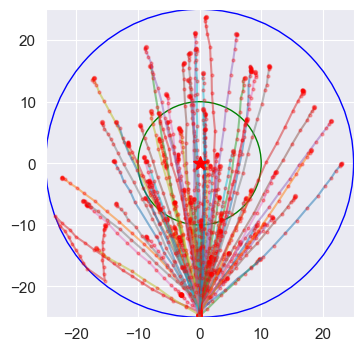

In [ ]:
data_item.plot_scatter_around_target_df()

# Appendix

In [ ]:
# Retrieve more data
all_trial_features_lstm = pd.read_csv('RL_models/LSTM_stored_models/all_agents/gen_0/LSTM_Aug_1_24/patterns_and_features/all_trial_features.csv')
all_trial_features_valid_lstm = all_trial_features_lstm[(all_trial_features_lstm['t_last_vis']<50) & (all_trial_features_lstm['hitting_arena_edge']==False)].reset_index()
median_values_lstm = all_trial_features_valid_lstm.median(axis=0)

In [ ]:
# what percentage of points in monkey_information['time'].diff() is below 0.015?
t_diff = monkey_information['time'].diff()
np.where(t_diff < 0.015)[0].shape[0]/t_diff.shape[0]

In [ ]:
# find trials where two ff within 100 cm of each other appear at the same time
trials_for_planning = []
for trial in ff_dataframe_visible.target_index.unique():
    ff_subset = ff_dataframe_visible[ff_dataframe_visible.target_index == trial]
    ff_counting = ff_subset.groupby('point_index').count()
    ff_counting = ff_counting[ff_counting.ff_index > 1]
    point_index = ff_counting.point_index
    #ff_subset = ff_subset[ff_subset.point_index.isin(point_index)]
    # for each point index, see if the ff are within 100 of each other
    for point_index in relevant_point_index:
        current_ff = ff_subset[ff_subset.point_index == point_index]
        # find if they're within 100 cm of each other
        # ... and then I decided to use find_point_vs_cluster
    if len(ff_subset) > 0:
        trials_for_planning.append(trial)


# Debug

In [ ]:
#!pip install -Uqq ipdb
import ipdb
%pdb on